<a href="https://colab.research.google.com/github/mashaan14/Vectorization-in-Python/blob/main/Vectorization_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Label Propagation using Vectorization
We'll consider the simple problem of propagating labels from $k$-means centroids to the rest of the dataset. A label will be assigned simply based on the minimum distance.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

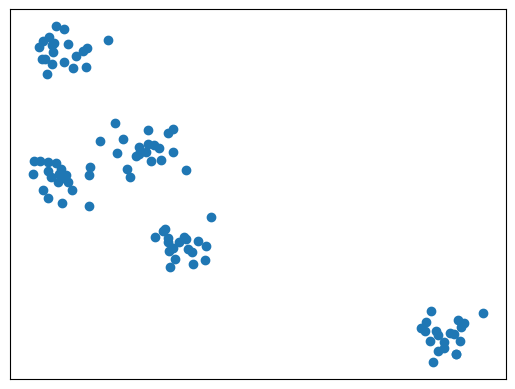

In [2]:
X, y = make_blobs(n_samples=100, centers=5, cluster_std=0.5, random_state=0)
plt.scatter(X[:,0], X[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

let's run $k$-means for one iteration, just to get the centroids initialized using $k$-means++ algorithm.

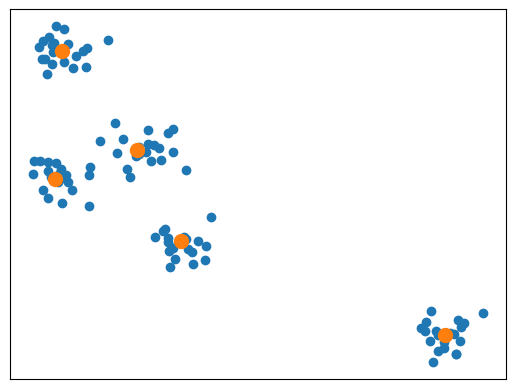

In [3]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=1, n_init=10)
kmeans.fit(X)
C = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1]);
plt.scatter(C[:,0], C[:,1], s=100);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

The distance computation is performed by vectorized operations in Python. The resulted distance matrix has 100 rows (the number of points) and 5 columns (the number of centroids).

In [4]:
D2 = np.sqrt(np.square(X[:, None, :] - C[None, :, :]).sum(axis=-1))
D2[:5, :]

array([[ 8.02852471, 15.19788771,  4.53004571,  0.34576092,  4.93024752],
       [ 3.59065349, 11.67906086,  2.83077335,  5.54127443,  0.89555385],
       [ 4.05029176, 12.11909266,  2.49860118,  4.79208748,  0.14024686],
       [ 4.32449754, 12.38680971,  2.59438976,  4.60132813,  0.15319697],
       [ 3.58980875, 10.65632949,  0.48799516,  4.2759879 ,  2.98927336]])

`argmin` function from `numpy` returns the index of the smallest distance. We'll get a row vector where each element represents the index of the nearest centroid to the corresponding point.

In [5]:
L2 = np.argmin(D2, axis=1)
L2[:5]

array([3, 4, 4, 4, 2])

By plotting the points and the centroids in colors, we can verify the labels were propogated correctly.

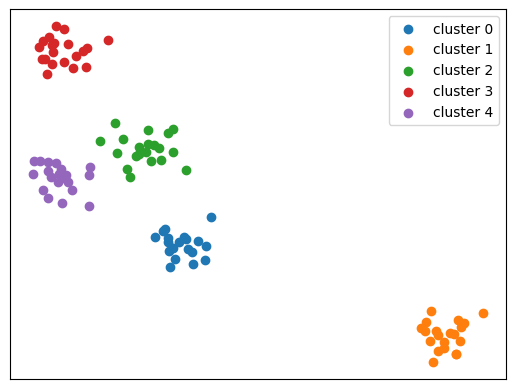

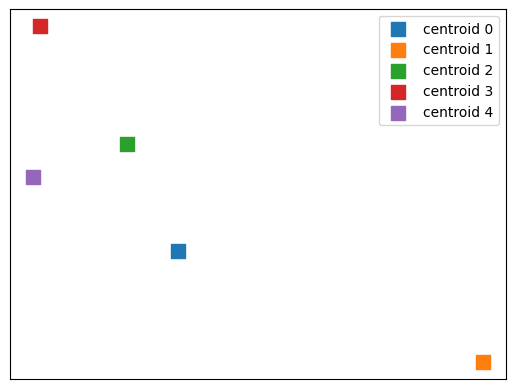

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
for g in np.unique(L2):
    xi = np.where(L2 == g)
    ax.scatter(X[xi, 0], X[xi, 1], label='cluster '+str(int(g)))

plt.legend(loc=0)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                labelbottom=False, labeltop=False, labelleft=False, labelright=False)

fig = plt.figure()
ax = fig.add_subplot(111)
for g in np.unique(L2):
    ax.scatter(C[g, 0], C[g, 1], marker='s', s=100, label='centroid '+str(int(g)))

plt.legend(loc=0)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                labelbottom=False, labeltop=False, labelleft=False, labelright=False)

In [7]:
!jupyter nbconvert --to html /content/Vectorization_02.ipynb

[NbConvertApp] Converting notebook /content/Vectorization_02.ipynb to html
[NbConvertApp] Writing 658101 bytes to /content/Vectorization_02.html
